In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv(r'E:\DATA SCIENCE\SUPERVISED\RANDOM FOREST/churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.iloc[:,4]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [5]:
df.iloc[:,14]

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [8]:
senior_male_electronic = df[(df["gender"]=='Male') & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic

customerID gender  SeniorCitizen Partner Dependents  tenure  \
14    5129-JLPIS   Male              0      No         No      25   
20    8779-QRDMV   Male              1      No         No       1   
26    6467-CHFZW   Male              0     Yes        Yes      47   
27    8665-UTDHZ   Male              0     Yes        Yes       1   
36    6047-YHPVI   Male              0      No         No       5   
...          ...    ...            ...     ...        ...     ...   
7014  9053-EJUNL   Male              0      No         No      41   
7020  9837-FWLCH   Male              0     Yes        Yes      12   
7021  1699-HPSBG   Male              0      No         No      12   
7022  7203-OYKCT   Male              0      No         No      72   
7032  6894-LFHLY   Male              1      No         No       1   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
14            Yes                No     Fiber optic                  Yes  ...   
20             No  No phone service             DSL                   No  ...   
26            Yes               Yes     Fiber optic                   No  ...   
27             No  No phone service             DSL                   No  ...   
36            Yes                No     Fiber optic                   No  ...   
...           ...               ...             ...                  ...  ...   
7014          Yes               Yes     Fiber optic                   No  ...   
7020          Yes                No              No  No internet service  ...   
7021          Yes                No             DSL                   No  ...   
7022          Yes               Yes     Fiber optic                   No  ...   
7032          Yes               Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
14                    Yes                  Yes                  Yes   
20                    Yes                   No                   No   
26                     No                   No                  Yes   
27                     No                   No                   No   
36                     No                   No                   No   
...                   ...                  ...                  ...   
7014                   No                   No                  Yes   
7020  No internet service  No internet service  No internet service   
7021                   No                  Yes                  Yes   
7022                  Yes                   No                  Yes   
7032                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
14                    Yes  Month-to-month              Yes  Electronic check   
20                    Yes  Month-to-month              Yes  Electronic check   
26                    Yes  Month-to-month              Yes  Electronic check   
27                     No  Month-to-month               No  Electronic check   
36                     No  Month-to-month              Yes  Electronic check   
...                   ...             ...              ...               ...   
7014                   No  Month-to-month              Yes  Electronic check   
7020  No internet service  Month-to-month              Yes  Electronic check   
7021                   No        One year              Yes  Electronic check   
7022                  Yes        One year              Yes  Electronic check   
7032                   No  Month-to-month              Yes  Electronic check   

     MonthlyCharges  TotalCharges Churn  
14           105.50       2686.05    No  
20            39.65         39.65   Yes  
26            99.35       4749.15   Yes  
27            30.20          30.2   Yes  
36            69.70         316.9   Yes  
...             ...           ...   ...  
7014          89.20       3645.75    No  
7020          19.20           239    No  
7021        

In [9]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [10]:
customer_total_tenure = df[(df['Contract'] == 'Five year') | (df['MonthlyCharges'] >100)]
customer_total_tenure

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
8     7892-POOKP  Female              0     Yes         No      28   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
...          ...     ...            ...     ...        ...     ...   
7022  7203-OYKCT    Male              0      No         No      72   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
8             Yes           Yes     Fiber optic             No  ...   
12            Yes           Yes     Fiber optic             No  ...   
13            Yes           Yes     Fiber optic             No  ...   
14            Yes            No     Fiber optic            Yes  ...   
15            Yes           Yes     Fiber optic            Yes  ...   
...           ...           ...             ...            ...  ...   
7022          Yes           Yes     Fiber optic             No  ...   
7023          Yes           Yes     Fiber optic             No  ...   
7034          Yes           Yes     Fiber optic            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
8                 Yes         Yes         Yes             Yes  Month-to-month   
12                Yes          No         Yes             Yes        One year   
13                Yes          No         Yes             Yes  Month-to-month   
14                Yes         Yes         Yes             Yes  Month-to-month   
15                Yes         Yes         Yes             Yes        Two year   
...               ...         ...         ...             ...             ...   
7022              Yes          No         Yes             Yes        One year   
7023              Yes          No         Yes             Yes  Month-to-month   
7034              Yes          No         Yes              No  Month-to-month   
7039              Yes          No         Yes             Yes        One year   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
8                 Yes           Electronic check         104.80       3046.05   
12                 No    Credit card (automatic)         100.35        5681.1   
13                Yes  Bank transfer (automatic)         103.70        5036.3   
14                Yes           Electronic check         105.50       2686.05   
15                 No    Credit card (automatic)         113.25       7895.15   
...               ...                        ...            ...           ...   
7022              Yes           Electronic check         104.95        7544.3   
7023              Yes           Electronic check         103.50        6479.4   
7034              Yes    Credit card (automatic)         102.95       6886.25   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
8      Yes  
12      No  
13     Yes  
14      No  
15      No  
...    ...  
7022    No  
7023    No  
7034   Yes  
7039    No  
7042    No  

[902 rows x 21 columns]

In [11]:
two_mail_yes = df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year               No  Mailed check   
5947  No internet service  Two year              Yes  Mailed check   
6680                   No  Two year              Yes  Mailed check   

     MonthlyCharges  TotalCharges Churn  
268           19.35        1099.6   Yes  
5947          24.50         740.3   Yes  
6680          95.50       4627.85   Yes  

[3 rows x 21 columns]

In [12]:
customer_333 = df.sample(n = 333)
customer_333.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5509  1809-DMJHQ  Female              0      No        Yes       5   
3868  1396-QWFBJ  Female              0     Yes        Yes      21   
577   8270-RKSAP    Male              0      No         No       9   
3176  5044-XDPYX  Female              0     Yes         No      51   
2113  7607-QKKTJ    Male              0     Yes        Yes      45   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
5509          Yes            No             DSL                   No  ...   
3868          Yes            No     Fiber optic                   No  ...   
577           Yes            No     Fiber optic                   No  ...   
3176          Yes           Yes              No  No internet service  ...   
2113          Yes           Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5509                   No                   No                   No   
3868                   No                   No                   No   
577                    No                   No                   No   
3176  No internet service  No internet service  No internet service   
2113                  Yes                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
5509                   No  Month-to-month               No   
3868                   No  Month-to-month              Yes   
577                    No  Month-to-month              Yes   
3176  No internet service        Two year               No   
2113                  Yes        One year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
5509               Mailed check          46.00         221.7   Yes  
3868  Bank transfer (automatic)          74.05        1565.7   Yes  
577            Electronic check          70.50         597.9    No  
3176               Mailed check          25.50       1281.25    No  
2113    Credit card (automatic)          95.00       4368.85    No  

[5 rows x 21 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

<BarContainer object of 3 artists>

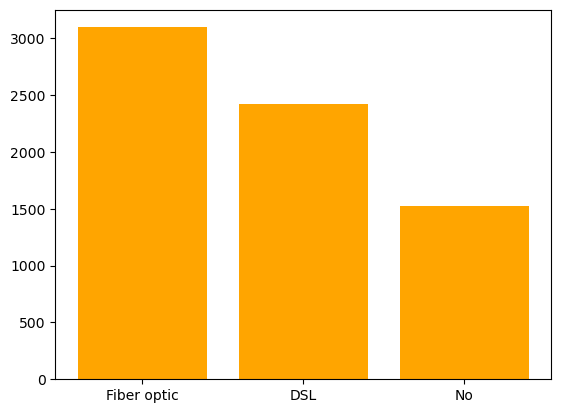

In [15]:
x = df['InternetService'].value_counts().keys()
y = df['InternetService'].value_counts()
plt.bar(x,y,color = 'orange')

<Axes: xlabel='tenure', ylabel='Count'>

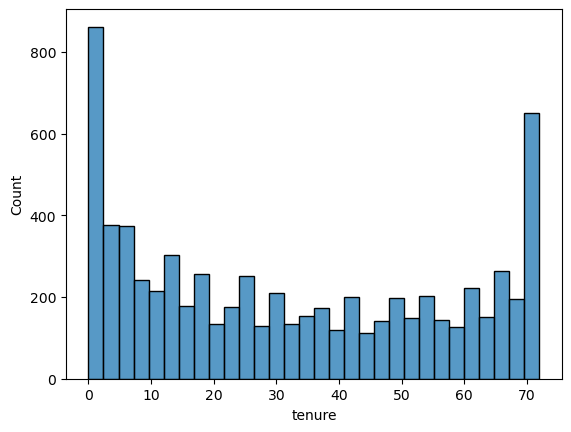

In [16]:
sns.histplot(df['tenure'],bins = 30)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

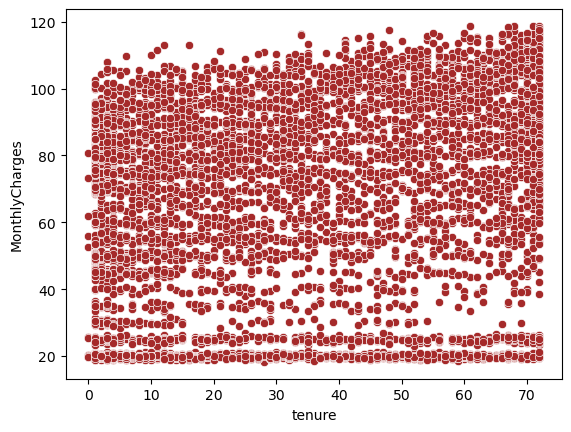

In [17]:
sns.scatterplot(x = df['tenure'],y = df['MonthlyCharges'],color = 'brown')

In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df = df.dropna(axis = 0)

In [26]:
x = pd.DataFrame(df['tenure'])
y = df['MonthlyCharges']

In [27]:
x

tenure
0          1
1         34
2          2
3         45
4          2
...      ...
7038      24
7039      72
7040      11
7041       4
7042      66

[7032 rows x 1 columns]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 44)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 1)
(1758, 1)
(5274,)
(1758,)


In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
pred = model.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error

In [39]:
mse = mean_squared_error(x_test,pred)
rmse = np.sqrt(mse)

In [40]:
rmse

36.38788431990818

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
col = df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])

C:\Users\HP\AppData\Local\Temp\ipykernel_6420\3990795163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_6420\3990795163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_6420\3990795163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [45]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5365       0              0        1           0       0   
1           3953       1              0        0           0      33   
2           2558       1              0        0           0       1   
3           5524       1              0        0           0      44   
4           6500       0              0        0           0       1   
...          ...     ...            ...      ...         ...     ...   
7038        4843       1              0        1           1      23   
7039        1524       0              0        1           1      71   
7040        3358       0              0        1           1      10   
7041        5923       1              1        1           0       3   
7042        2221       1              0        0           0      65   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2             142            74      0  
1                    0              3             497          3624      0  
2                    1              3             435           536      1  
3                    0              0             266          3570      0  
4                    1              2             728           674      1  
...                ...            ...             ...           ...    ...  
7038                 1              3             990          3700      0  
7039                 1              1            1339          6304      0  
7040                 1              2             137          1265      0  
7041                 1              3             794          1157      1  
7042                 1              0            1387          6150      0  

[7032 rows x 21 columns]

In [46]:
x = pd.DataFrame(df['MonthlyCharges'])
y = df['Churn']

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state = 45)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4570, 1)
(2462, 1)
(4570,)
(2462,)


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train,y_train)

LogisticRegression()

In [57]:
pred = model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [59]:
confusion_matrix(y_test,pred)

array([[1805,    0],
       [ 657,    0]], dtype=int64)

In [58]:
accuracy_score(y_test,pred)

0.7331437855402112

In [65]:
x = pd.DataFrame(df.loc[:,['MonthlyCharges','tenure']])
y = df['Churn']

In [66]:
x

MonthlyCharges  tenure
0                142       0
1                497      33
2                435       1
3                266      44
4                728       1
...              ...     ...
7038             990      23
7039            1339      71
7040             137      10
7041             794       3
7042            1387      65

[7032 rows x 2 columns]

In [67]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 45)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 2)
(1407, 2)
(5625,)
(1407,)


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = DecisionTreeClassifier()

In [71]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
pred = model.predict(x_test)

In [74]:
confusion_matrix(y_test,pred)

array([[832, 189],
       [209, 177]], dtype=int64)

In [75]:
accuracy_score(y_test,pred)

0.7171286425017769

In [81]:
x = pd.DataFrame(df.loc[:,['MonthlyCharges','tenure']])
y = df['Churn']

In [82]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 46)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4922, 2)
(2110, 2)
(4922,)
(2110,)


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = RandomForestClassifier(n_estimators = 100)

In [86]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
pred = model.predict(x_test)

In [88]:
confusion_matrix(y_test,pred)

array([[1322,  224],
       [ 314,  250]], dtype=int64)

In [89]:
accuracy_score(y_test,pred)

0.7450236966824645